# OCR with Python and Tesseract

# Text recognition in images

## Installing Tesseract

- Documentation: https://pypi.org/project/pytesseract/

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,797 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

## Importing the libraries

In [ ]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow

## Reading the image

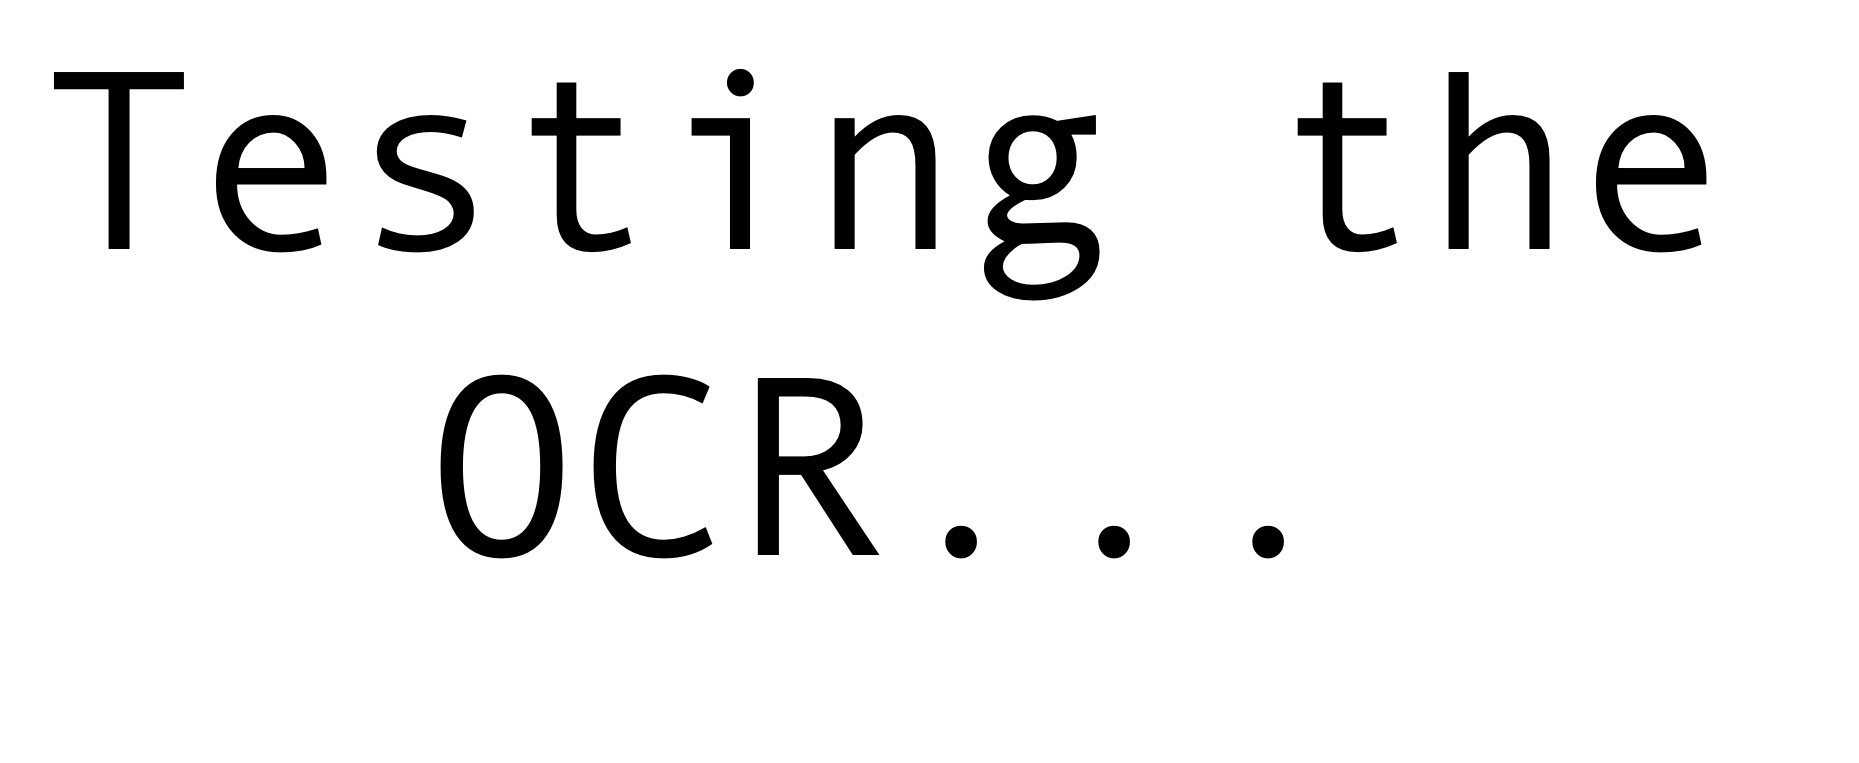

In [ ]:
img = cv2.imread('/content/test01.jpg')
cv2_imshow(img) # BGR -> RGB

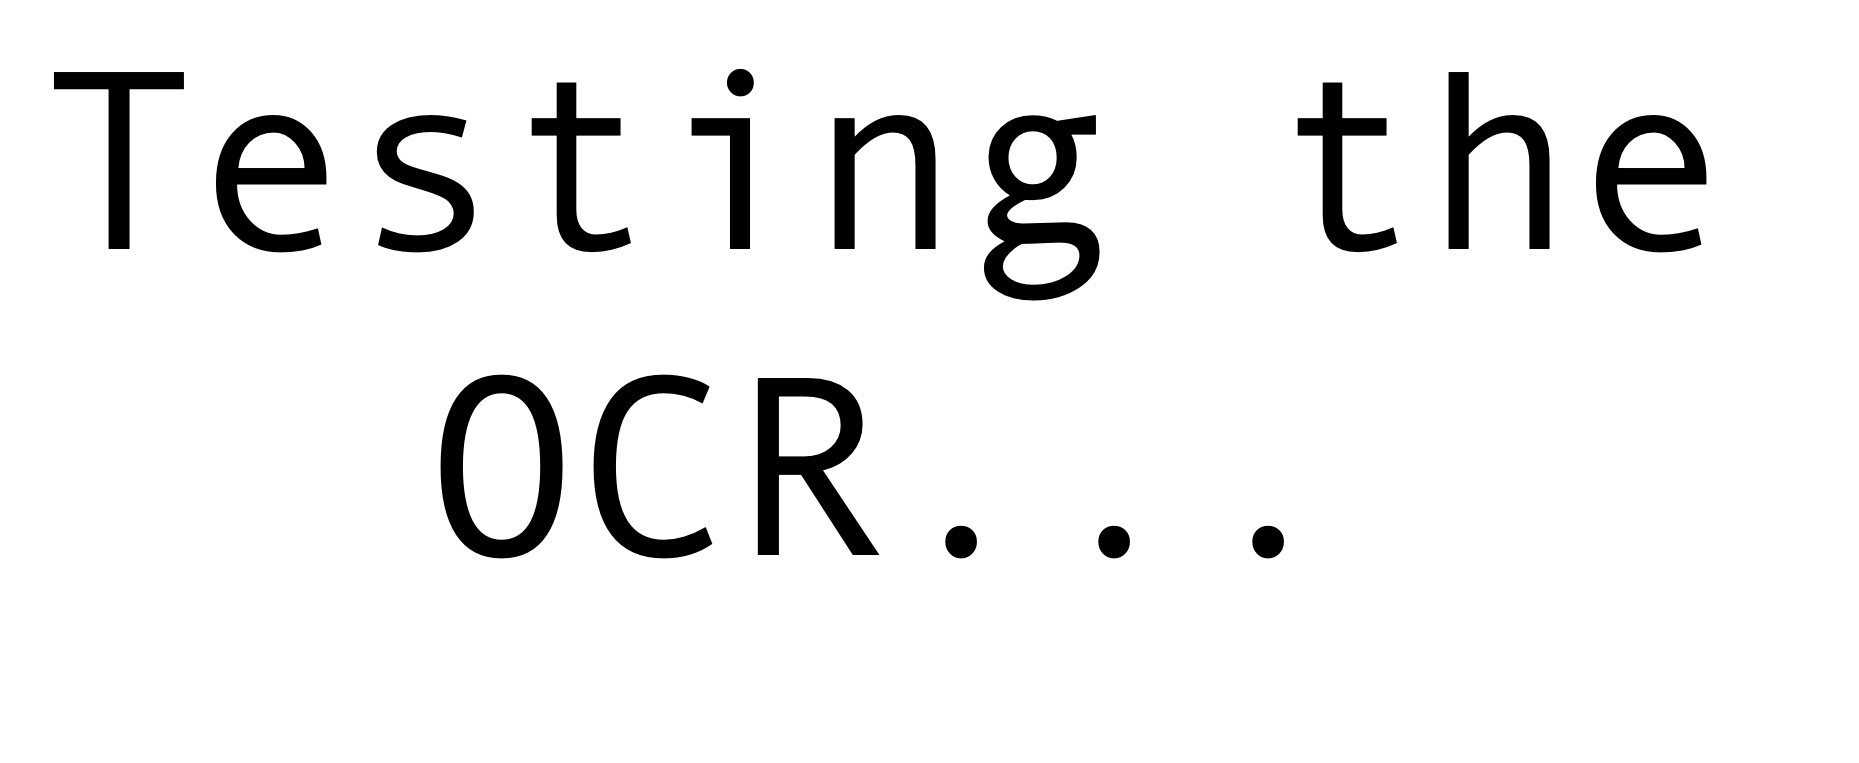

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
text = pytesseract.image_to_string(rgb)

In [ ]:
print(text)

Testing the
OCR...



## Support for other languages

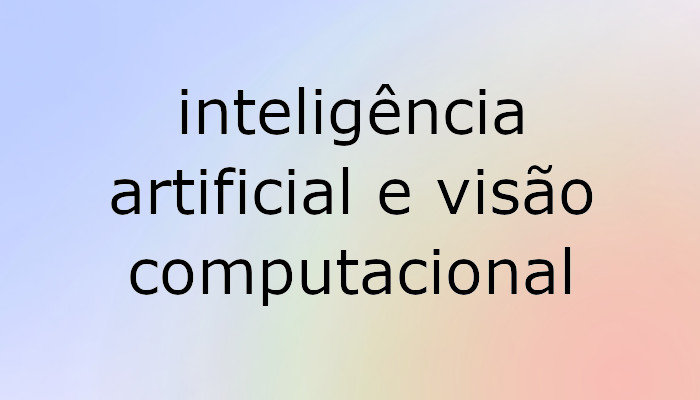

In [ ]:
img = cv2.imread('/content/test02-02.jpg')
cv2_imshow(img)

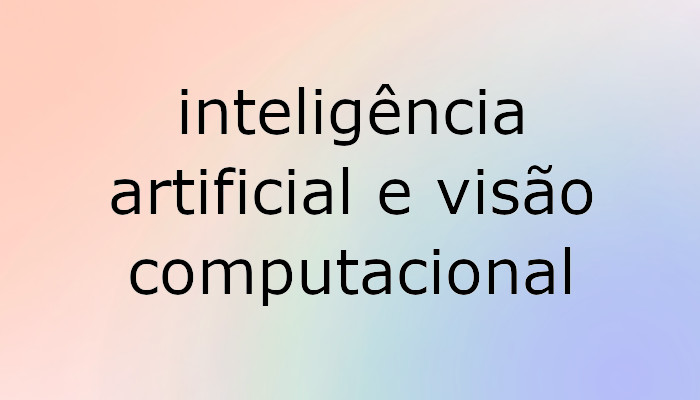

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
text = pytesseract.image_to_string(rgb)
print(text)

inteligéncia
artificial e visao
computacional



In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [ ]:
!apt-get install tesseract-ocr-por # Portuguese

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [ ]:
text = pytesseract.image_to_string(rgb, lang='por')
print(text)

inteligência
artificial e visão
computacional



In [ ]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2022-03-28 20:53:03--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-03-28 20:53:03--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-03-28 20:53:03--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional



In [ ]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2022-03-28 20:55:55--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata [following]
--2022-03-28 20:55:55--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2022-03-28 20:55:55--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [ ]:
!ls tessdata/

eng.traineddata  por.traineddata


## Parameters

### Page segmentation modes (PSM)

In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


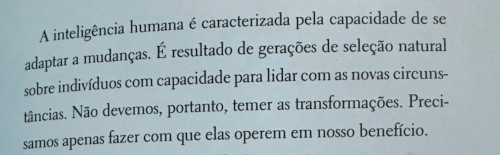

In [ ]:
img = cv2.imread('/content/page-book.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



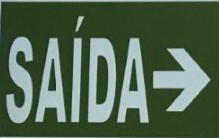

In [ ]:
img = cv2.imread('/content/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



### Page orientation

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

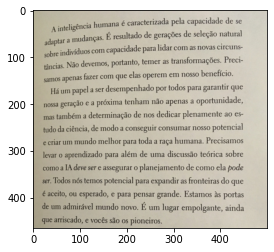

In [ ]:
img = Image.open('/content/book01.jpg')
plt.imshow(img);

In [ ]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Selection of texts



In [ ]:
from pytesseract import Output

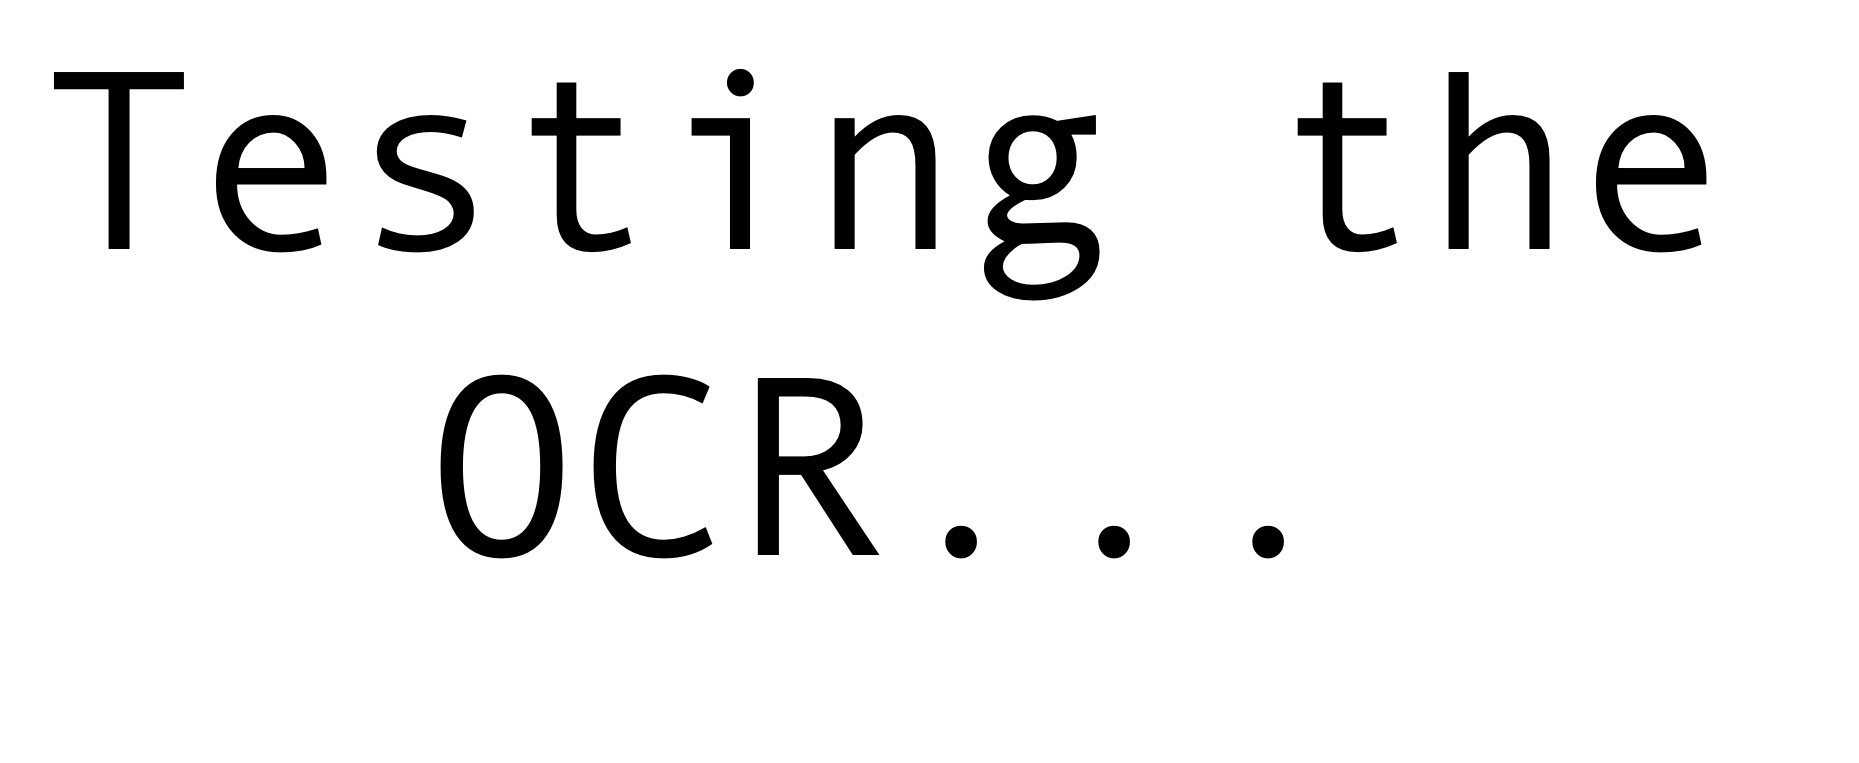

In [ ]:
img = cv2.imread('/content/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type=Output.DICT)
result

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 88, 92, '-1', 89, 90],
 'height': [763, 489, 489, 231, 231, 180, 183, 183, 32],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1098],
 'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'],
 'top': [0, 69, 69, 69, 69, 72, 375, 375, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 536, 186],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2]}

- block_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is a region

- conf = prediction confidence (from 0 to 100. -1 means no text was recognized)

- height = height of detected block of text (bounding box)

- left = x coordinate where the bounding box starts

- level = the level corresponds to the category of the detected block. There are 5 possible values:
  1. page
  2. block
  3. paragraph
  4. line
  5. word

Therefore, if 5 is returned, it means that the detected block is text, if it was 4, it means that a line was detected

- line_num = line number (starts from 0)

- page_num = the index of the page where the item was detected

- text = the recognition result

- top = y-coordinate where the bounding box starts

- width = width of the current detected text block

- word_num = word number (index) within the current block

In [ ]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [ ]:
def bouding_box(result, img, i, color = (255,100,0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

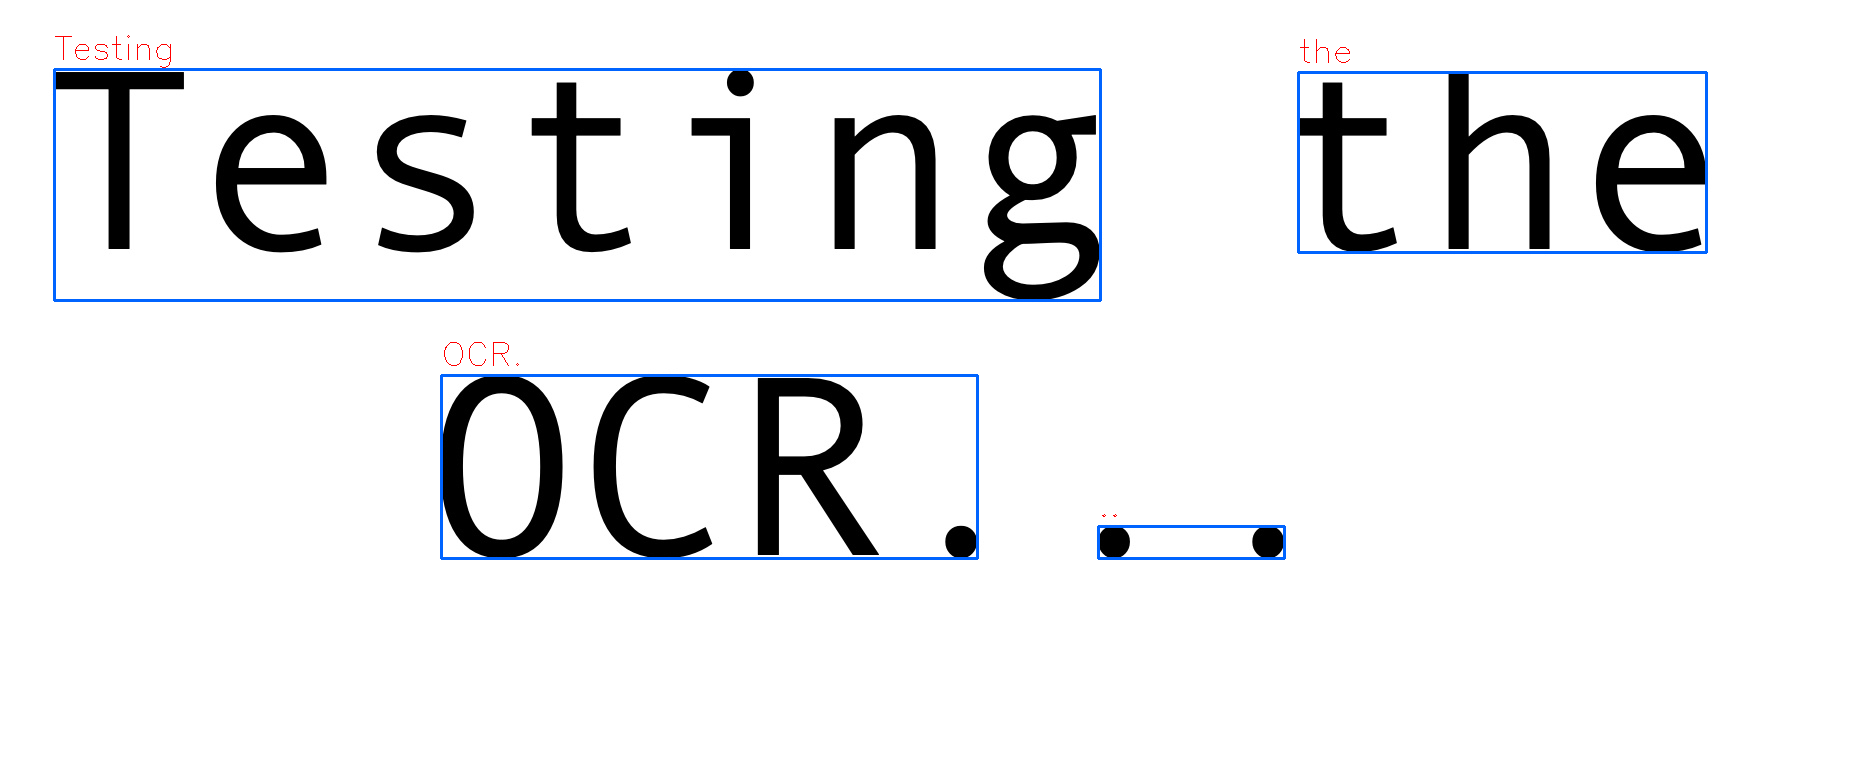

In [ ]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  #print(i)
  confidence = int(result['conf'][i])
  #print(confidence)
  if confidence > min_confidence:
    #print(confidence)
    x, y, img = bouding_box(result, img_copy, i)
    #print(x,y)
    text = result['text'][i]
    cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

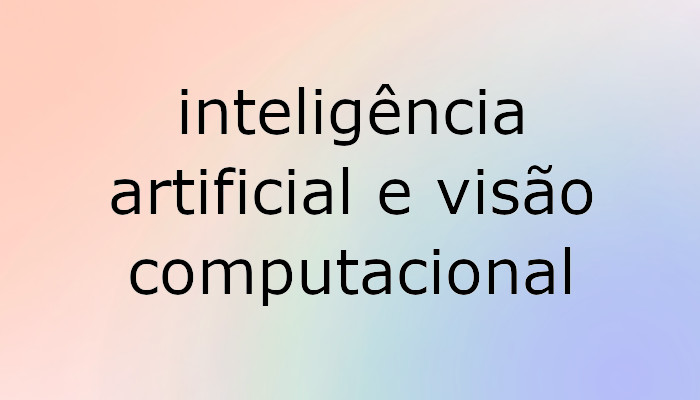

In [ ]:
img = cv2.imread('/content/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type = Output.DICT)
result

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', 88, 93, 91, '-1', 91],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional'],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1]}

In [ ]:
from PIL import ImageFont, ImageDraw, Image
font = '/content/calibri.ttf'

In [ ]:
def write_text(text, x, y, img, font, font_size = 32):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font)
  img = np.array(img_pil)
  return img

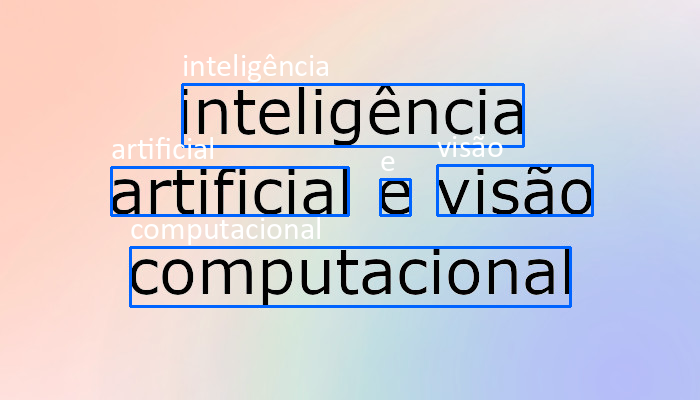

In [ ]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copy = write_text(text, x, y, img_copy, font)
cv2_imshow(img_copy)

# Searching specific information

In [ ]:
import re # regular expressions

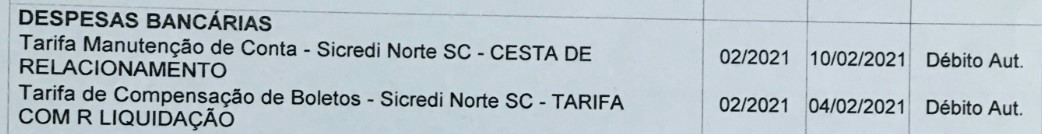

In [ ]:
img = cv2.imread('/content/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  92,
  92,
  '-1',
  '-1',
  '-1',
  92,
  91,
  91,
  92,
  93,
  92,
  92,
  93,
  94,
  92,
  92,
  91,
  87,
  87,
  87,
  '-1',
  90,
  '-1',
  92,
  92,
  92,
  93,
  92,
  93,
  92,
  91,
  93,
  96,
  92,
  87,
  87,
  77,
  84,
  '-1',
  '-1',
  '-1',
  90,
  93,
  91],
 'height': [134,
  22,
  22,
  22,
  19,
  21,
  82,
  82,
  34,
  17,
  22,
  16,
  16,
  2,
  17,
  16,
  15,
  2,
  16,
  15,
  16,
  15,
  16,
  15,
  20,
  20,
  32,
  17,
  16,
  21,
  16,
  16,
  3,
  16,
  16,
  16,
  2,
  16,
  15,
  16,
  15,
  15,
  23,
  23,
  23,
  16,
  16,
  23],
 'left': [0,
  19,
  19,
  19,
  19,
  147,
  19,
  19,
  19,
  19,
  84,
  211,
  241,
  304,
  318,
  388,
  444,
  478,
  491,

In [ ]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

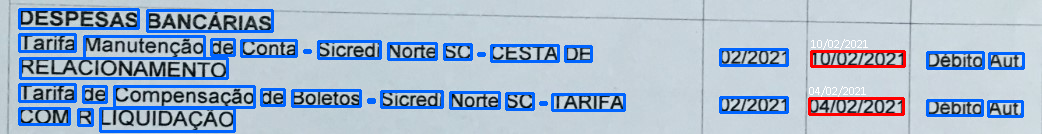

In [ ]:
dates = []
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if re.match(date_pattern, text):
      x, y, img = bouding_box(result, img_copy, i, (0,0,255))
      #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
      img_copy = write_text(text, x, y, img_copy, font, 12)
      dates.append(text)
    else:
      x, y, img_copy = bouding_box(result, img_copy, i)
cv2_imshow(img_copy)

In [ ]:
dates

['10/02/2021', '04/02/2021']

# Detecting texts in natural scenarios

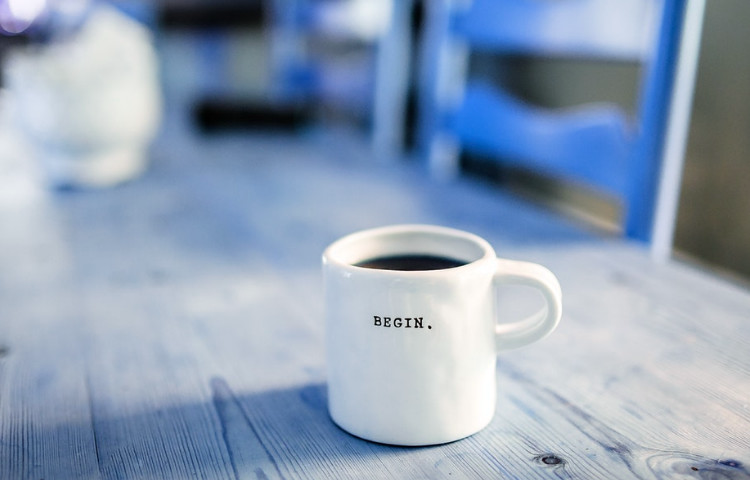

In [ ]:
img = cv2.imread('/content/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
result = pytesseract.image_to_data(rgb, lang = 'eng', output_type=Output.DICT)
result

{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  95,
  '-1',
  '-1',
  '-1',
  76,
  '-1',
  '-1',
  '-1',
  95],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', ''],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]}

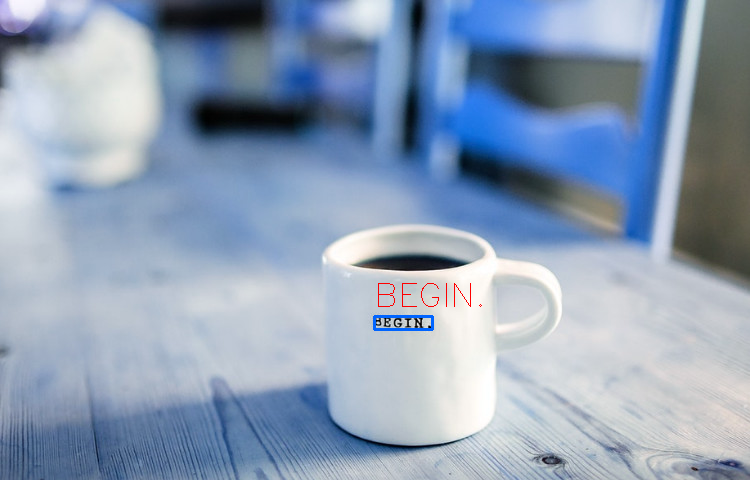

In [ ]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if not text.isspace() and len(text) > 0:
      x, y, img = bouding_box(result, img_copy, i)
      cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

In [ ]:
result['conf']

['-1', '-1', '-1', '-1', 95, '-1', '-1', '-1', 76, '-1', '-1', '-1', 95]

In [ ]:
result['text']

['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']